In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
divider = '===================================='
import sklearn
import autosklearn.classification as Classifier # Automatically selects the best model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

# Importing the data in a csv file

In [ ]:
data = pd.read_csv("feature_df.csv")
data.tail()

,Condition,abs_energy,autocorr,calc_mean,calc_median,calc_std,entropy,kurtosis,mean_abs_deviation,negative_turning,...,median_frequency,power_bandwidth,spectral_centroid,spectral_decrease,spectral_distance,spectral_entropy,spectral_skewness,spectral_kurtosis,spectral_variation,total_energy
87549,Q,9.503015,9.503015,0.157435,0.163158,0.161346,0.671934,0.725872,0.130433,18,...,4.043478,10.695187,10.569418,-1.316918,-3862.513053,0.470369,1.751357,5.211207,0.261690,6.386435
87550,Q,35.362748,35.362748,0.324631,0.461667,0.289345,0.717449,-1.322736,0.264798,5,...,1.347826,8.021390,7.661235,-1.881415,-7046.907556,0.304709,2.327616,8.116642,0.068754,23.765287
87551,Q,32.298332,32.298332,0.315615,0.437755,0.270380,0.732751,-1.594944,0.252448,9,...,2.021739,8.021390,8.490503,-1.909501,-6583.628406,0.291207,2.097562,6.785864,0.091988,21.705869
87552,Q,6.180274,6.180274,0.100887,0.081013,0.151233,0.716627,12.656483,0.087491,7,...,7.413043,14.037433,12.664070,-0.645100,-3794.137385,0.663590,1.592966,4.909545,0.224194,4.153410
87553,Q,38.614038,38.614038,0.345208,0.418308,0.295506,0.710595,-1.512179,0.272379,9,...,1.347826,7.352941,8.243089,-1.921883,-7234.797437,0.307459,2.172443,7.118649,0.086944,25.950295


# Select the fraction of data to train the model with

In [ ]:
# data2 = pd.read_csv("filtered_data.csv").drop(columns = ["Condition"])
# data2.head()
data = data.sample(frac = 0.5) # 50 % of the data was used to train the model 

# Separate the data into features and labels

In [ ]:
X = data.iloc[:, 1:].values # Features data frame
# X2 = data2.iloc[:, :-1].values
y = data.iloc[:, 0].values # Label data frame
# y2 = data2.iloc[:, -1].values

label_encoder = LabelEncoder() # Encode the label in the form of numbers
y = label_encoder.fit_transform(y)
# y2 = label_encoder.fit_transform(y2)

# Separate dat ainto training and testing data
20 % of the data was used as testing data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=0)

# Define the model and train the model.
(**NOTE:** This will take a considerable amount of time to run)

In [ ]:
automlClassifier = Classifier.AutoSklearnClassifier(time_left_for_this_task=1800, 
                                                    per_run_time_limit = 200)
automlClassifier.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=200, time_left_for_this_task=1800)

# Make predictions and see acuracy

In [ ]:
y_pred = automlClassifier.predict(X_test)

score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Final accuracy of the model is {score}")

Final accuracy of the model is 0.9679077204202833


# See the models used 

In [ ]:
automlClassifier.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.041360214588561095,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f6d20035880>,
  'balancing': Balancing(random_state=1),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f6d20035af0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f6d216ad610>,
  'sklearn_classifier': RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                         random_state=1, warm_start=True)},
 4: {'model_id': 4,
  'rank': 2,
  'cost': 0.17824694990049317,
  'ensemble_weight': 0.04,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f6d1ffd0100>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreproce

# Print model statistics

In [ ]:
print(automlClassifier.sprint_statistics())

auto-sklearn results:
  Dataset name: 82b2c6c6-d19d-11ed-82e3-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.962274
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 22
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0



# Print model leaderboard

In [ ]:
automlClassifier.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
9,1,0.20,gradient_boosting,0.037726,24.624764
15,2,0.08,gradient_boosting,0.038591,34.561401
20,3,0.04,extra_trees,0.039197,183.308672
2,4,0.02,random_forest,0.041360,63.364051
5,5,0.14,mlp,0.041879,36.085438
22,6,0.02,random_forest,0.044216,101.848626
17,7,0.02,random_forest,0.044735,46.572901
16,8,0.02,random_forest,0.048802,22.647004
19,9,0.08,gradient_boosting,0.059012,10.104957


# Confusion Matrix


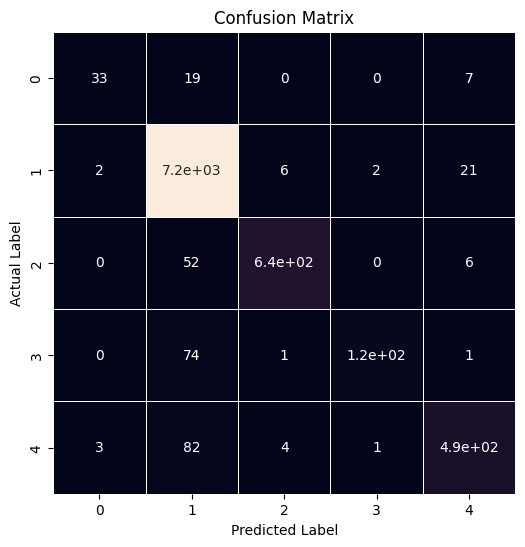

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (6, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, linewidth = 0.5, square = True, cbar = False)
plt.title(f"Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.savefig("Confusion_matrix.png")

# Get accuracy, recall, f1, precision

1. Precision
$$
\frac{\text{True positive}}{\text{True Positive + False positive}}
$$


2. Recall


$$
\frac{\text{True positive}}{\text{True Positive + False negative}}
$$



In [ ]:
def create_dataframe(keys, vals):
  results = {key: val for key, val in zip(keys, vals)}

  return pd.DataFrame(results, index = [0])


def get_precision(conf_matrix: np.ndarray) -> pd.DataFrame:
  final_result = []
  true_positives = conf_matrix.diagonal()
  keys = ["True positive", "False positive", "False Negative", "Precision", "Recall"]

  for col_idx, true_pos in enumerate(true_positives):
    column_vals = conf_matrix[:, col_idx]
    row_vals = conf_matrix[col_idx, :]
    false_positives = np.delete(column_vals, np.where(column_vals == true_pos))
    false_negatives = np.delete(row_vals, np.where(row_vals == true_pos))
    precision = true_pos / np.sum(column_vals)
    recall = true_pos / np.sum(row_vals)
    f1_score = 2 * (precision * recall) / (precision + recall)
    vals = [true_pos, np.sum(false_positives), np.sum(false_negatives),
            precision, recall]
    result = create_dataframe(keys, vals)
    final_result.append(result)

  results_df = pd.concat(final_result, axis = 0)
  results_df.index = [0, 1, 2, 3, 4]
  return results_df


In [ ]:
get_precision(conf_matrix)

,True positive,False positive,False Negative,Precision,Recall
0,33,5,26,0.868421,0.559322
1,7193,227,31,0.969407,0.995709
2,642,11,58,0.983155,0.917143
3,117,3,76,0.975000,0.606218
4,490,35,90,0.933333,0.844828


# Save the model and load the model in `pickle` format

In [ ]:
import pickle

# Save the model
with open("model.pkl", "wb") as file:
  pickle.dump(automlClassifier, file)

# Load the model
with open("model.pkl", "rb") as file:
  classifier = pickle.load(file)

# Make predictions and check accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred = y_pred)
print(f"Accuracy score = {accuracy}")

Accuracy score = 0.9679077204202833


## Download the model as a `pickle` file

In [ ]:
from google.colab import files
files.download("/content/model.pkl")

## Visualizing the pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import set_config

In [ ]:
steps =   {'balancing': "Undersample the biggest dataset",
  'Feature preprocessor': None,
  'classifier': HistGradientBoostingClassifier(early_stopping=True,
                                 l2_regularization=1.3153561911035717e-10,
                                 learning_rate=0.025345400213312417, loss='auto',
                                 max_iter=512, max_leaf_nodes=16,
                                 min_samples_leaf=27, n_iter_no_change=5,
                                 random_state=1,
                                 validation_fraction=0.2361478213622299,
                                 warm_start=True)}

pipe = Pipeline(steps)

In [ ]:
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step